# **Introduction to Data Science - Final Projet**

**Submitters:**

Alaa Ghanaiem ID 200764546

Anna Mosenzon ID 200320836

Part 1

#1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

path_train = '/content/drive/My Drive/Introduction to Data Science/data/ctr_dataset_train.csv'
path_test = '/content/drive/My Drive/Introduction to Data Science/data/ctr_dataset_test.csv'

Mounted at /content/drive



Saving the data as pandas dataframe

In [3]:
X_train  = pd.read_csv(path_train)
X_test_test = pd.read_csv(path_test)

Presenting the first 5 rows in the training set:

In [4]:
X_train.head()

,op_id,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version,device_height,device_width,resolution,clicked
0,448ed944-b0a3-4f8e-9662-fb1202e2777b,1569445326,New Jersey,Comcast Cable,6rm7ag7,games - simulation,top-right,Samsung,SM-G925V,6.0.1,792,1408,True,False
1,3c501ca8-f771-4926-acce-d532f979b8b5,1566517297,Illinois,Verizon Wireless,74193f6,games - card,right,NaN,NaN,7.0,2560,1440,True,False
2,db342130-0f34-4d43-a72c-3c1891eade24,1566375809,California,T-Mobile USA,6549c21,games - puzzle,top-left,NaN,NaN,7.0,1280,720,True,False
3,f080c21c-7791-44c5-9429-8eb411786fe7,1568568842,California,T-Mobile USA,dng7e8p,unknown,left,Samsung,SM-J700T1,7.1.1,1280,720,True,False
4,3ca5ac37-7beb-4d2e-b0a8-662a4f9eb614,1571357999,Georgia,North Carolina Research and Education Network,hp3monn,games - simulation,top-left,T-Mobile,5049W,7.0,720,1280,True,True


Presenting the first 5 rows in the test set:

In [5]:
X_test_test.head()

,op_id,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version,device_height,device_width,resolution
0,63166542-e886-492f-8ff3-4d4f24c03363,1569363301,Minnesota,Savage Communications,59da3a2,games - board,bottom-right,Samsung,SM-S727VL,6.0.1,720,1280,True
1,411ef0c9-2bdc-48ea-ad87-1f257445efcf,1568625996,Wisconsin,Spectrum,pnomoth,games - puzzle,left,Samsung,SM-G920R4,7,1920,1080,True
2,36ad3f28-87dc-4843-963a-43908e120038,1570769732,Florida,Spectrum Business,3tsgr77,unknown,bottom-right,Motorola,Moto E4,7.1.1,720,1280,True
3,29051da4-d042-4513-9ff8-1946c6fdc9c7,1569689737,Arizona,Suddenlink Communications,dcoenhs,games - puzzle,bottom,Google,Pixel XL,9,1920,1080,True
4,5afed6da-ea4d-4eda-a21e-cc5ac341201f,1568791645,North Carolina,Spectrum Business,62cph6n,games - board,bottom-left,LG,LS676,6.0.1,720,1280,True


#2. Data Exploration:

###Data Statistics

In [6]:
df = X_train

def plot_hist(feature, num_of_bins):
    plt.hist(df[feature],num_of_bins,  ec='black')
    plt.xlabel(feature)
    plt.ylabel('Probability')
    plt.title('Histogram of ' + feature)
    plt.grid(True)
    plt.show()


def plot_bar_chart(feature, num_of_bars):
    x = df.groupby([feature]).size().nlargest(num_of_bars).reset_index()
    plt.figure(figsize=(8, 3))
    plt.bar(x[feature],x[0],align='edge', width = 0.5)
    plt.xticks(x[feature], rotation='vertical')
    plt.title('# of users by ' + feature)

We will examine some of the features in the data set.

We will show the first 20 states with the highest number of users who viewed the advertisement or page:

In [7]:
X_train.groupby(["state"]).size().nlargest(20).reset_index()

,state,0
0,Texas,327255
1,California,315552
2,Florida,210513
3,Illinois,155753
4,New York,144551
5,Georgia,101430
6,North Carolina,96959
7,Michigan,95544
8,Ohio,82881
9,Pennsylvania,72190


Basic statistics about the continuos features:

In [8]:
X_train.describe()

,timestamp,device_height,device_width
count,2.519056e+06,2.519056e+06,2.519056e+06
mean,1.569178e+09,1.181182e+03,1.152202e+03
std,2.319487e+06,5.193045e+02,4.526964e+02
min,1.564423e+09,1.400000e+01,1.400000e+01
25%,1.567306e+09,7.200000e+02,7.200000e+02
50%,1.569317e+09,1.080000e+03,1.080000e+03
75%,1.570937e+09,1.280000e+03,1.280000e+03
max,1.573475e+09,3.120000e+03,3.120000e+03


Plots representing the categorial features (top 20 with the highest number of users who viewed the advertisement or ad):

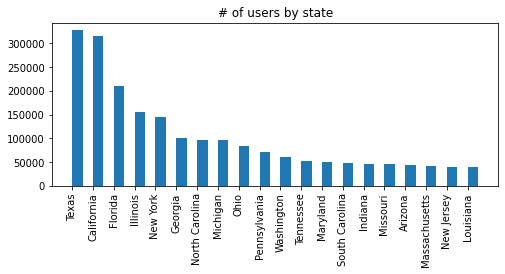

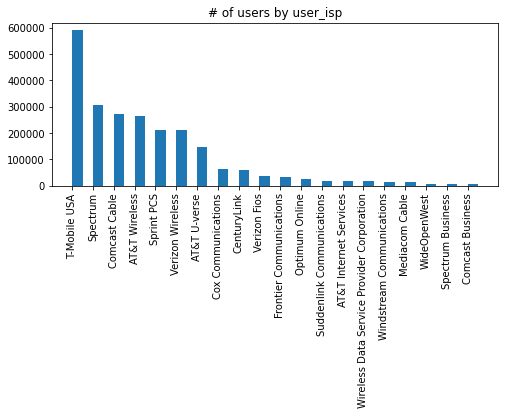

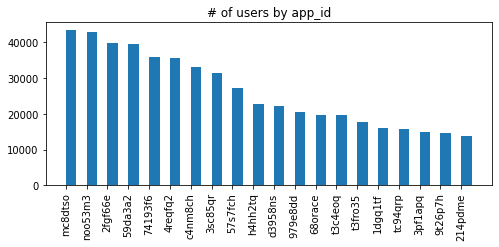

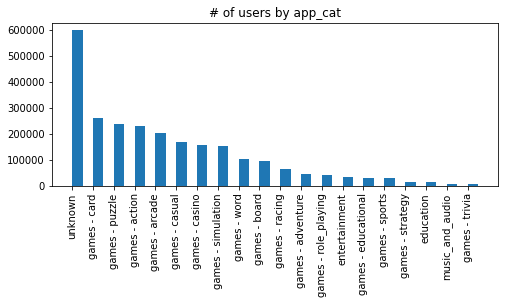

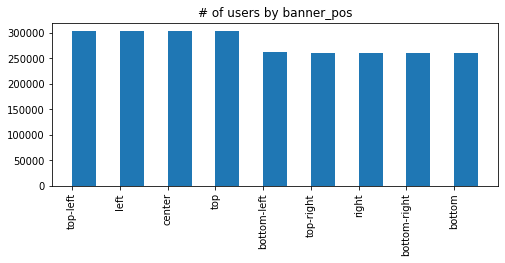

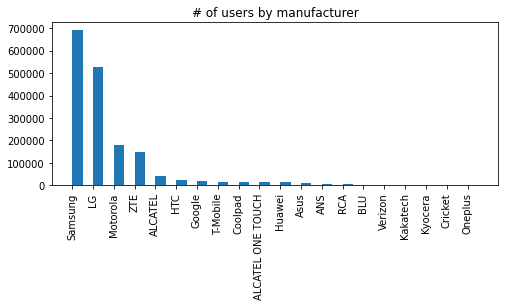

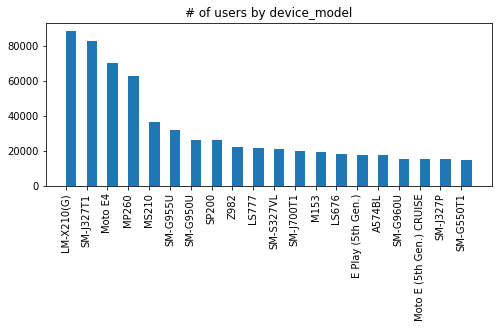

In [9]:
plot_bar_chart('state', 20)
plot_bar_chart('user_isp',20)
plot_bar_chart('app_id',20)
plot_bar_chart('app_cat',20)
plot_bar_chart('banner_pos',10)
plot_bar_chart('manufacturer',20)
plot_bar_chart('device_model',20)

We can conclude that the most frequent views are from the states Texas, California, and Florida. The most common Internet Service providers are T-Mobile, Spectrum, and Comcast Cable.Most of the views arriving from game applications, mainly cards, puzzles, and action games.The most common device manufacturers are Motorola, LG, and Samsung.in conclusion, we will advise creating ads that are suitable mostly to these devices from these manufacturers and for games applications.

Histograms for the continuos data:

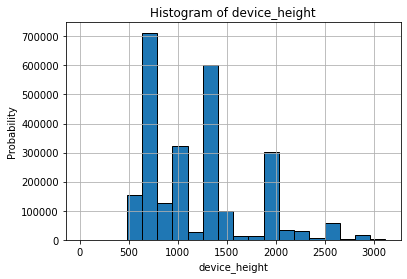

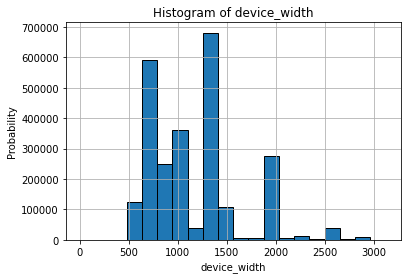

In [10]:
plot_hist('device_height', 20)
plot_hist('device_width', 20)

The height and width of the devices do not distribute normally, and are mainly the following size:

Height:

In [11]:
df.groupby(['device_height']).size().nlargest(3).reset_index()

,device_height,0
0,720,710306
1,1280,593285
2,1080,299770


Width:

In [12]:
df.groupby(['device_width']).size().nlargest(3).reset_index()

,device_width,0
0,1280,679093
1,720,583283
2,1080,353198


##Correlation matrix

Before presenting the correlation matrix we will remove some columns from reasons that are not related to high corelation between features:
The column "resolution" has the same value for all observations ("TRUE"), so there is no information gain using this column and we will remove it.

In [13]:
print(X_train.groupby(["resolution"]).size().reset_index())
print("% of unique values in resolution: " + str(X_train["resolution"].nunique() / X_train.shape[0]))
X_train = X_train.drop(columns = "resolution")
X_test_test = X_test_test.drop(columns = "resolution")

   resolution        0
0        True  2519056
% of unique values in resolution: 3.969741045852097e-07


We will examine two columns that we are suspect to be unique and non informative:

In [14]:
print("% of unique values in timestamp: " + str(X_train["timestamp"].nunique() / X_train.shape[0]))
print("% of unique values in op_id: " + str(X_train["op_id"].nunique() / X_train.shape[0]))

% of unique values in timestamp: 0.7664740283661816
% of unique values in op_id: 1.0


Since the "op_id" is a unique value, no information can be derived from it so we will remove it. "timestamp" value is not unique so we will keep it.

In [15]:
X_train = X_train.drop(columns = "op_id")
X_test_test = X_test_test.drop(columns = "op_id")

In [16]:
def cat_code(X, col_list):

  for col in col_list:
    X[col] = X[col].astype('category').cat.codes
  return X

In [17]:
X_train4cat = X_train.copy()
col_list = list(X_train.columns)
col_list.remove('device_height')
col_list.remove('device_width')
X_train_cat_coded = cat_code(X_train4cat, col_list)

We will present the correlation matrix both in detailed numbers and with correlation map (as heat map):

In [18]:
X_train_cat_coded.drop(columns = "clicked").corr()

,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version,device_height,device_width
timestamp,1.000000,-0.023581,-0.006878,0.049108,0.111469,0.001488,0.565798,0.529609,0.002969,-0.185794,0.064093
state,-0.023581,1.000000,0.042617,0.000154,0.001934,-0.000020,-0.012194,-0.005848,-0.000235,0.010985,-0.009273
user_isp,-0.006878,0.042617,1.000000,0.002498,-0.013941,0.000561,-0.005509,0.009108,0.032219,0.031938,0.043940
app_id,0.049108,0.000154,0.002498,1.000000,0.028213,0.001874,0.011594,0.012604,0.004286,0.040869,-0.068362
app_cat,0.111469,0.001934,-0.013941,0.028213,1.000000,-0.001024,0.072382,0.068778,-0.005725,-0.031954,0.037788
banner_pos,0.001488,-0.000020,0.000561,0.001874,-0.001024,1.000000,-0.000620,-0.000122,-0.000700,0.002979,-0.005117
manufacturer,0.565798,-0.012194,-0.005509,0.011594,0.072382,-0.000620,1.000000,0.887361,-0.047760,-0.126501,0.126522
device_model,0.529609,-0.005848,0.009108,0.012604,0.068778,-0.000122,0.887361,1.000000,-0.028186,-0.093533,0.128957
device_version,0.002969,-0.000235,0.032219,0.004286,-0.005725,-0.000700,-0.047760,-0.028186,1.000000,0.245631,0.159067
device_height,-0.185794,0.010985,0.031938,0.040869,-0.031954,0.002979,-0.126501,-0.093533,0.245631,1.000000,-0.006680


In [19]:
def corr_mat(X):
  corrmat = X.corr()
  fig = plt.figure(figsize = (12, 10))
  sns.heatmap(corrmat,cmap='coolwarm',vmax = 0.8)
  plt.show()

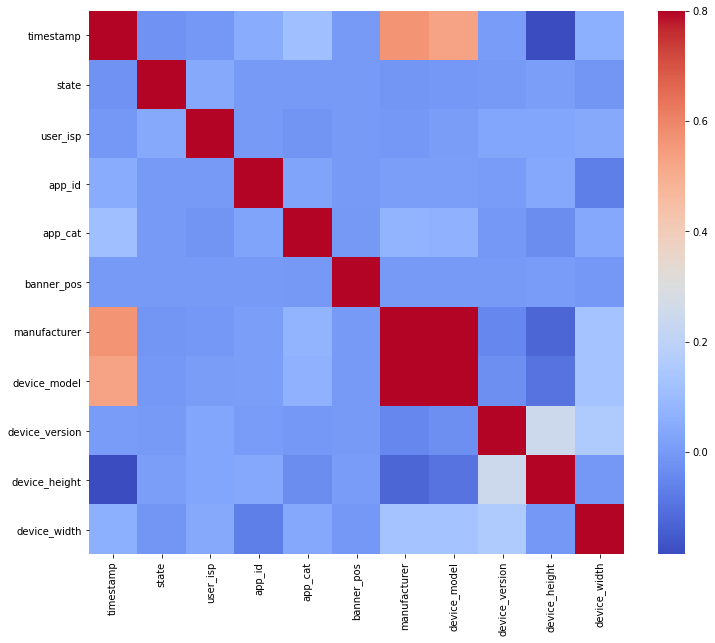

In [20]:
corr_mat(X_train_cat_coded.drop(columns = "clicked"))

We can see from the correlation matrix that there is a very high correlation between the manufacturer and the device_model (as we would expect, because there is no way that a device model of a specific manufacturer will be manufactured in a competitor manufacturer), so we will remove the "manufacturer" column, since in the "device_model" column we have more information.

In [21]:
X_train = X_train.drop(columns = "manufacturer")
X_test_test = X_test_test.drop(columns = "manufacturer")

###Imbalanced data

First, we will explore the current state of the data regarding balance:

In [22]:
def balance_table(X):
  balance_table = X.groupby(["clicked"]).size().reset_index()
  balance_table["%"] = pd.DataFrame(balance_table[0]) * 100 / X.shape[0]
  balance_table = balance_table.rename(columns = {0:"# of clicks"})
  display(balance_table)

# encode the data for balance test
X_train4cat = X_train.copy()
col_list = list(X_train.columns)
col_list.remove('device_height')
col_list.remove('device_width')
X_train_cat_coded = cat_code(X_train4cat, col_list)

balance_table(X_train4cat)

,clicked,# of clicks,%
0,0,2348498,93.229289
1,1,170558,6.770711


We can see that the data is imbalanced, so we will use SMOTE  method, as it is more adaptive and generates more synthetic data for minority class examples that are harder to learn.
Since SMOTE works on Continuous data, we decided to use another SMOTE version which works on categorical data, which is SMOTE-NC (SMOTE Nominal and Continuous)

In [23]:
def balance(X):
  y = X["clicked"]
  X = X.drop(columns = "clicked")
  cat_col_index = list(range(len(X.columns)-2))
  smote = SMOTENC(categorical_features=cat_col_index, random_state = 101)  
  X_resampled, y_resampled = smote.fit_sample(X.to_numpy(), y.to_numpy())
  X_resampled_with_col_name = pd.DataFrame(X_resampled, columns=X.columns)
  return X_resampled_with_col_name, y_resampled


We added undersampling method, because the SMOTE version didn't always works very well, in some cases of it ran for hours and in other cases it crashs because of a memory issue

In [24]:
def balance_under(X):
  y = X["clicked"]
  X = X.drop(columns = "clicked")
  undersample = RandomUnderSampler(sampling_strategy='majority')
  X_resampled, y_resampled = undersample.fit_sample(X.to_numpy(), y.to_numpy())
  X_resampled_with_col_name = pd.DataFrame(X_resampled, columns=X.columns)
  return X_resampled_with_col_name, y_resampled

In [25]:
X_resampled, y_resampled = balance_under(X_train4cat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Now, we will explore the new state of the data regarding balance, after using SMOTE method:

In [26]:
X_train_resampled = pd.DataFrame(X_resampled)
X_train_resampled["clicked"] = y_resampled
balance_table(X_train_resampled)

,clicked,# of clicks,%
0,0,170558,50.0
1,1,170558,50.0


We can see that the data is balanced, and we will check the performance of the model before and after the usage of SMOTE in section 6.

#3. Missing Values:


We will explore the missing data in our data set:

In [27]:
# We decided to consider "unknown" value as a NAN value.
X_train["app_cat"] = X_train["app_cat"].replace('unknown', np.nan)
X_test_test["app_cat"] = X_test_test["app_cat"].replace('unknown', np.nan)
print('# of missing values:')
print(X_train.isnull().sum())
print('')
print('% of missing values:')
print((100*X_train.isna().sum()/X_train.shape[0]).round(4))

# of missing values:
timestamp              0
state                  0
user_isp              32
app_id                 0
app_cat           596348
banner_pos             0
device_model      770846
device_version         0
device_height          0
device_width           0
clicked                0
dtype: int64

% of missing values:
timestamp          0.0000
state              0.0000
user_isp           0.0013
app_id             0.0000
app_cat           23.6735
banner_pos         0.0000
device_model      30.6006
device_version     0.0000
device_height      0.0000
device_width       0.0000
clicked            0.0000
dtype: float64


We will fill the missing values using the most common value

In [28]:
def fill_missing_data(data, col_list, most_freq_val):

  for col in col_list:
    data[col] = data[col].fillna(most_freq_val[col])

  return data


We decided to use the most frequent value tol fill the missing data in the train data

In [29]:
most_frequent_dict = {}
df_mode = X_train.mode()
for col in df_mode.columns:
  most_frequent_dict[col] = df_mode[col][0]

X_train = fill_missing_data(X_train, ["user_isp", "app_cat", "device_model"], most_frequent_dict)

X_train.isnull().sum()

timestamp         0
state             0
user_isp          0
app_id            0
app_cat           0
banner_pos        0
device_model      0
device_version    0
device_height     0
device_width      0
clicked           0
dtype: int64

In [30]:
print('# of missing values:')
print(X_test_test.isnull().sum())
print('')
print('% of missing values:')
print((100*X_test_test.isna().sum()/X_test_test.shape[0]).round(4))

# of missing values:
timestamp              0
state                  0
user_isp               7
app_id                 0
app_cat           149640
banner_pos             0
device_model      193011
device_version         0
device_height          0
device_width           0
dtype: int64

% of missing values:
timestamp          0.0000
state              0.0000
user_isp           0.0011
app_id             0.0000
app_cat           23.7613
banner_pos         0.0000
device_model      30.6481
device_version     0.0000
device_height      0.0000
device_width       0.0000
dtype: float64


We used the most frequent values in the train data to fill also the test data

In [31]:
X_test_test = fill_missing_data(X_test_test, ["user_isp", "app_cat", "device_model"], most_frequent_dict)
X_test_test.isnull().sum()

timestamp         0
state             0
user_isp          0
app_id            0
app_cat           0
banner_pos        0
device_model      0
device_version    0
device_height     0
device_width      0
dtype: int64

In [32]:
X_train.head(5)

,timestamp,state,user_isp,app_id,app_cat,banner_pos,device_model,device_version,device_height,device_width,clicked
0,1569445326,New Jersey,Comcast Cable,6rm7ag7,games - simulation,top-right,SM-G925V,6.0.1,792,1408,False
1,1566517297,Illinois,Verizon Wireless,74193f6,games - card,right,LM-X210(G),7.0,2560,1440,False
2,1566375809,California,T-Mobile USA,6549c21,games - puzzle,top-left,LM-X210(G),7.0,1280,720,False
3,1568568842,California,T-Mobile USA,dng7e8p,games - card,left,SM-J700T1,7.1.1,1280,720,False
4,1571357999,Georgia,North Carolina Research and Education Network,hp3monn,games - simulation,top-left,5049W,7.0,720,1280,True


#4. Feature Engineering:

We will explore the "app_cat" category, as we suspect that there is a sub category in it of the type of the game app:

In [33]:
X_train.groupby(["app_cat"]).size().nlargest(47).reset_index()

,app_cat,0
0,games - card,854892
1,games - puzzle,235599
2,games - action,231354
3,games - arcade,203151
4,games - casual,168405
5,games - casino,154872
6,games - simulation,154567
7,games - word,101790
8,games - board,96278
9,games - racing,64367


In [34]:
print("% of unique values in app_cat: " + str(X_train["app_cat"].nunique() / X_train.shape[0]))
print("# of unique values in app_cat: " + str(X_train["app_cat"].nunique()))

% of unique values in app_cat: 1.7863834706334435e-05
# of unique values in app_cat: 45


We will create an additional feature that hold the game type. If there the type of the app is not a game we will insert -1 as after this phase we will reprocess the new column to category codes: 

In [35]:
def add_game_cat(X):
  app_cat = X['app_cat']
  game_cat = app_cat.str.split(" - ").str[1]
  game_cat = game_cat.replace(np.nan, -1 , regex=True)
  X["game_cat"] = game_cat
  return X

X_train_feature_eng = add_game_cat(X_train)

In [36]:
X_test_feature_eng = add_game_cat(X_test_test)

Now we can create the "mirror" feature for the game_cat: we will simplified the app_cat feature to the main categories, without the sub category of the game:

In [37]:
def add_main_cat(X):
  app_cat = X['app_cat']
  app_main_cat = app_cat.str.split(" - ").str[0]
  X["app_main_cat"] = app_main_cat
  return X

X_train_feature_eng = add_main_cat(X_train)

In [38]:
X_test_feature_eng = add_main_cat(X_test_test)

In [39]:
X_train_feature_eng.groupby(["app_main_cat"]).size().nlargest(47).reset_index()

,app_main_cat,0
0,games,2434937
1,entertainment,34842
2,education,14944
3,music_and_audio,5918
4,libraries_and_demo,4970
5,personalization,3887
6,tools,3467
7,productivity,3061
8,social,2924
9,auto_and_vehicles,1844


We will create a feature that aggregates both the "device_height" column and "device_width" to the "device_area" column, which may provide additional information, and may imply the convenience of the clicking action.

In [40]:
def add_area(X):
  device_area = X["device_height"] * X["device_width"]
  X["device_area"] = device_area
  return X

X_train_feature_eng = add_area(X_train_feature_eng)

In [41]:
X_test_feature_eng = add_area(X_test_feature_eng)

We will generate a feature that holds the version of the device per model phone, so we can have the information hides within each model.The "device_model" column holds a string that has no connection to the model, while there is information that can be implied from the order of the device version, so each version within a device model was indexed in increasing order (from oldest to newest version).

In [42]:
def add_version_per_model(X):
  version_per_model = X.sort_values(['device_model', 'device_version'] , ascending=[True, True])
  version_per_model_col = []
  version_per_model_col.append(0)
  j = -1
  for i in range(len(version_per_model)-1):
    if (version_per_model["device_version"][i] == version_per_model["device_version"][i+1]) and (version_per_model["device_model"][i] == version_per_model["device_model"][i+1]):
      version_per_model_col.append(j)
    elif (version_per_model["device_version"][i] != version_per_model["device_version"][i+1]) and (version_per_model["device_model"][i] == version_per_model["device_model"][i+1]):
      version_per_model_col.append(j+1)
      j = j+1
    else:
      j=0
      version_per_model_col.append(j)

  X["version_per_model"] = version_per_model_col
  return X

X_train_feature_eng = add_version_per_model(X_train_feature_eng)

In [43]:
X_test_feature_eng = add_version_per_model(X_test_feature_eng)

In [44]:
X_train_feature_eng.head(5)

,timestamp,state,user_isp,app_id,app_cat,banner_pos,device_model,device_version,device_height,device_width,clicked,game_cat,app_main_cat,device_area,version_per_model
0,1569445326,New Jersey,Comcast Cable,6rm7ag7,games - simulation,top-right,SM-G925V,6.0.1,792,1408,False,simulation,games,1115136,0
1,1566517297,Illinois,Verizon Wireless,74193f6,games - card,right,LM-X210(G),7.0,2560,1440,False,card,games,3686400,0
2,1566375809,California,T-Mobile USA,6549c21,games - puzzle,top-left,LM-X210(G),7.0,1280,720,False,puzzle,games,921600,0
3,1568568842,California,T-Mobile USA,dng7e8p,games - card,left,SM-J700T1,7.1.1,1280,720,False,card,games,921600,0
4,1571357999,Georgia,North Carolina Research and Education Network,hp3monn,games - simulation,top-left,5049W,7.0,720,1280,True,simulation,games,921600,0


In [45]:
X_test_feature_eng.head()

,timestamp,state,user_isp,app_id,app_cat,banner_pos,device_model,device_version,device_height,device_width,game_cat,app_main_cat,device_area,version_per_model
0,1569363301,Minnesota,Savage Communications,59da3a2,games - board,bottom-right,SM-S727VL,6.0.1,720,1280,board,games,921600,0
1,1568625996,Wisconsin,Spectrum,pnomoth,games - puzzle,left,SM-G920R4,7,1920,1080,puzzle,games,2073600,0
2,1570769732,Florida,Spectrum Business,3tsgr77,games - card,bottom-right,Moto E4,7.1.1,720,1280,card,games,921600,0
3,1569689737,Arizona,Suddenlink Communications,dcoenhs,games - puzzle,bottom,Pixel XL,9,1920,1080,puzzle,games,2073600,0
4,1568791645,North Carolina,Spectrum Business,62cph6n,games - board,bottom-left,LS676,6.0.1,720,1280,board,games,921600,0


In [46]:
X_train_for_corr = X_train_feature_eng.copy()
col_list = list(X_train_for_corr.columns)
col_list.remove('device_height')
col_list.remove('device_width')
col_list.remove('device_area')
X_train_feature_eng_cat_coded = cat_code(X_train_for_corr, col_list)

In [47]:
X_train_feature_eng_cat_coded.head(5)

,timestamp,state,user_isp,app_id,app_cat,banner_pos,device_model,device_version,device_height,device_width,clicked,game_cat,app_main_cat,device_area,version_per_model
0,1014144,30,629,3437,25,8,1472,3,792,1408,0,13,13,1115136,0
1,312898,13,3054,3600,17,5,861,5,2560,1440,0,5,13,3686400,0
2,292515,4,2604,3021,22,7,861,5,1280,720,0,10,13,921600,0
3,746665,4,2604,6930,17,4,1620,7,1280,720,0,5,13,921600,0
4,1503964,10,1885,9366,25,7,71,5,720,1280,1,13,13,921600,0


Now will categorize the new features as well:

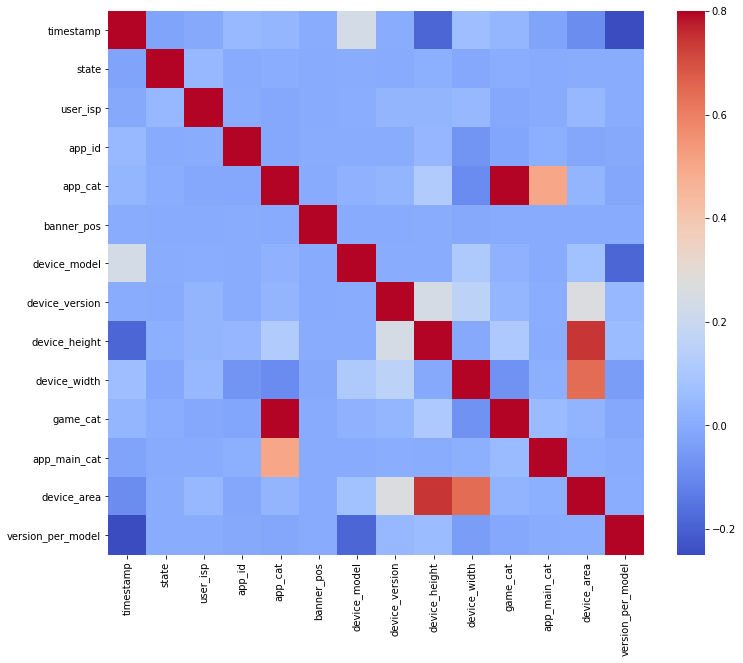

In [48]:
corr_mat(X_train_feature_eng_cat_coded.drop(columns = "clicked"))

We can see that "device_area" feature has high corelation with "device_height" feature and "device_width" feature so in order to reduce dimensions we will remove the "device_height" feature and "device_width" so we will have only the "devide_area" feature which include both hight and weight information.

In [49]:
X_train_feature_eng = X_train_feature_eng.drop(columns = "device_height")
X_train_feature_eng = X_train_feature_eng.drop(columns = "device_width")
X_train_feature_eng = X_train_feature_eng.drop(columns = "app_cat")

In [50]:
X_test_feature_eng = X_test_feature_eng.drop(columns = "device_height")
X_test_feature_eng = X_test_feature_eng.drop(columns = "device_width")
X_test_feature_eng = X_test_feature_eng.drop(columns = "app_cat")

We will repeat the pre processing that we did before the feature engineering, including categorizing the new features:

In [51]:
area_col_data =X_train_feature_eng["device_area"]
timestamp_col_data = X_train_feature_eng["timestamp"]
X_train_feature_eng = X_train_feature_eng.drop(["device_area", "timestamp"], axis=1)

X_train_feature_eng.head()

,state,user_isp,app_id,banner_pos,device_model,device_version,clicked,game_cat,app_main_cat,version_per_model
0,New Jersey,Comcast Cable,6rm7ag7,top-right,SM-G925V,6.0.1,False,simulation,games,0
1,Illinois,Verizon Wireless,74193f6,right,LM-X210(G),7.0,False,card,games,0
2,California,T-Mobile USA,6549c21,top-left,LM-X210(G),7.0,False,puzzle,games,0
3,California,T-Mobile USA,dng7e8p,left,SM-J700T1,7.1.1,False,card,games,0
4,Georgia,North Carolina Research and Education Network,hp3monn,top-left,5049W,7.0,True,simulation,games,0


In [52]:
area_col_test_data =X_test_feature_eng["device_area"]
timestamp_col_test_data = X_test_feature_eng["timestamp"]
X_test_feature_eng = X_test_feature_eng.drop(["device_area", "timestamp"], axis=1)

X_test_feature_eng.head()

,state,user_isp,app_id,banner_pos,device_model,device_version,game_cat,app_main_cat,version_per_model
0,Minnesota,Savage Communications,59da3a2,bottom-right,SM-S727VL,6.0.1,board,games,0
1,Wisconsin,Spectrum,pnomoth,left,SM-G920R4,7,puzzle,games,0
2,Florida,Spectrum Business,3tsgr77,bottom-right,Moto E4,7.1.1,card,games,0
3,Arizona,Suddenlink Communications,dcoenhs,bottom,Pixel XL,9,puzzle,games,0
4,North Carolina,Spectrum Business,62cph6n,bottom-left,LS676,6.0.1,board,games,0


In [53]:
clicked_col_data = X_train_feature_eng["clicked"].astype('category').cat.codes

In [54]:
X_train_feature_eng = X_train_feature_eng.drop(["clicked"], axis=1)

For the following reasons we decided to encode and engineer the train and test data as one dataset:
1. We can't use LabelEncoder/OneHotEncoder on the train becasue the test data has new categories that not exist in the test data

So we aggregated the train and test data, encoded it, and then separate the train and test again.


In [55]:
train_objs_num = len(X_train_feature_eng)
all_data = pd.concat(objs=[X_train_feature_eng, X_test_feature_eng], axis=0)

col_list = list(all_data.columns)
X_train_feature_eng_cat_coded = cat_code(all_data, col_list)

In [56]:
train_data = X_train_feature_eng_cat_coded[:train_objs_num].copy()
train_data["clicked"] = clicked_col_data
test_data = X_train_feature_eng_cat_coded[train_objs_num:].copy()

In [57]:
train_data["device_area"] = area_col_data
train_data["timestamp"] = timestamp_col_data
train_data.head()

,state,user_isp,app_id,banner_pos,device_model,device_version,game_cat,app_main_cat,version_per_model,clicked,device_area,timestamp
0,30,659,3575,8,1529,4,13,13,0,0,1115136,1569445326
1,13,3176,3745,5,896,7,5,13,0,0,3686400,1566517297
2,4,2713,3141,7,896,7,10,13,0,0,921600,1566375809
3,4,2713,7197,4,1679,10,5,13,0,0,921600,1568568842
4,10,1969,9735,7,74,7,13,13,0,1,921600,1571357999


In [58]:
test_data["device_area"] = area_col_test_data
test_data["timestamp"] = timestamp_col_test_data
test_data.head()

,state,user_isp,app_id,banner_pos,device_model,device_version,game_cat,app_main_cat,version_per_model,device_area,timestamp
0,23,2415,2649,2,1786,4,4,13,0,921600,1569363301
1,49,2581,12223,4,1509,6,10,13,0,2073600,1568625996
2,9,2582,1850,2,1049,10,5,13,0,921600,1570769732
3,2,2670,7019,0,1221,17,10,13,0,2073600,1569689737
4,33,2582,3063,1,909,4,4,13,0,921600,1568791645


In [59]:
X_train_resampled, y_train_resampled = balance_under(train_data)
X_train_resampled["clicked"] = y_train_resampled

balance_table(X_train_resampled)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,clicked,# of clicks,%
0,0,170558,50.0
1,1,170558,50.0


#Data Normalization

We decided to use the Min-Max scalar method since most of the data is categorical and does not distribute normally, so normalization with a Z score would be less suitable in our case.

In [60]:
X_train_resampled.head()

,state,user_isp,app_id,banner_pos,device_model,device_version,game_cat,app_main_cat,version_per_model,device_area,timestamp,clicked
0,32,50,10988,0,1547,14,3,13,0,2073600,1569350084,0
1,2,2713,4232,2,1447,4,6,13,0,921600,1568004864,0
2,14,659,11241,0,947,7,10,13,0,921600,1570847109,0
3,35,2598,8067,4,1049,10,14,13,0,921600,1568812059,0
4,13,50,886,6,933,4,5,13,0,409920,1568057174,0


In [61]:
min_max_scaler = MinMaxScaler()
y_train_resampled = X_train_resampled["clicked"]
X_train_resampled = X_train_resampled.drop("clicked", axis=1)
X_train_resampled[['device_area']] = min_max_scaler.fit_transform(pd.DataFrame(X_train_resampled[["device_area"]]))
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train_resampled.columns)

X_train_resampled.head()


,state,user_isp,app_id,banner_pos,device_model,device_version,game_cat,app_main_cat,version_per_model,device_area,timestamp
0,32,50,10988,0,1547,14,3,13,0,0.461497,1569350084
1,2,2713,4232,2,1447,4,6,13,0,0.205066,1568004864
2,14,659,11241,0,947,7,10,13,0,0.205066,1570847109
3,35,2598,8067,4,1049,10,14,13,0,0.205066,1568812059
4,13,50,886,6,933,4,5,13,0,0.091169,1568057174


We use the same min max scaler for the test data, it will be scaled according to the train scale.

In [62]:
test_data[['device_area']] = min_max_scaler.transform(pd.DataFrame(test_data[["device_area"]]))
test_data = pd.DataFrame(test_data, columns=test_data.columns)
test_data.head()

,state,user_isp,app_id,banner_pos,device_model,device_version,game_cat,app_main_cat,version_per_model,device_area,timestamp
0,23,2415,2649,2,1786,4,4,13,0,0.205066,1569363301
1,49,2581,12223,4,1509,6,10,13,0,0.461497,1568625996
2,9,2582,1850,2,1049,10,5,13,0,0.205066,1570769732
3,2,2670,7019,0,1221,17,10,13,0,0.461497,1569689737
4,33,2582,3063,1,909,4,4,13,0,0.205066,1568791645


#Training:

In [63]:
!pip install catboost

     |████████████████████████████████| 65.8MB 90kB/s 


In [64]:
!pip install pprintpp

In [65]:
!pip install hypopt

In [66]:
!pip install paramsearch

ERROR: Could not find a version that satisfies the requirement paramsearch (from versions: none)
ERROR: No matching distribution found for paramsearch


In [67]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import  roc_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
import catboost as cb
from catboost import CatBoostClassifier
from scipy.stats import uniform
from pprint import pprint
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer

we will split the data to train, validation and test:

In [68]:
X_train_resampled.head()

,state,user_isp,app_id,banner_pos,device_model,device_version,game_cat,app_main_cat,version_per_model,device_area,timestamp
0,32,50,10988,0,1547,14,3,13,0,0.461497,1569350084
1,2,2713,4232,2,1447,4,6,13,0,0.205066,1568004864
2,14,659,11241,0,947,7,10,13,0,0.205066,1570847109
3,35,2598,8067,4,1049,10,14,13,0,0.205066,1568812059
4,13,50,886,6,933,4,5,13,0,0.091169,1568057174


In [69]:
#first, we will split to train and test sets:
y = y_train_resampled
X = X_train_resampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

#second, we will split the train set to train and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

Defining performance measurements method that will be used for all the models that we will build (recall, precision, AUC and accuracy):

In [70]:
def classification_multi_class_report(y_test, model_predictions):
    report = classification_report(y_test, model_predictions, output_dict=True)
    display(pd.DataFrame(report).transpose().round(2))

def auc_value(y_test , y_test_predicted):
  fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test , y_test_predicted , pos_label=1)
  auc_value_test = metrics.auc(fpr_test, tpr_test)
  print("AUC value: " + str(auc_value_test))

In [71]:
def slice_for_debug(X_train, X_test, y_train, y_test, X_val, y_val, n):
  X_train = X_train.head(n)
  y_train = y_train.head(n)
  X_test = X_test.head(n)
  y_test = y_test.head(n)
  X_val = X_val.head(n)
  y_val = y_val.head(n)
  return X_train, X_val, X_test, y_train, y_val, y_test

In [72]:
X_train_db, X_val_db, X_test_db, y_train_db, y_val_db, y_test_db = slice_for_debug(X_train, X_test, y_train, y_test, X_val, y_val, 7000)

We decided to build and train the follwong 3 models: Random Forest, XGBoost and CATBoost

###Random Forest

In [73]:
RF = ExtraTreesClassifier(n_estimators=1000,bootstrap=True,warm_start=True,random_state=0)
RF.fit(X_train_db, y_train_db)

y_RF_predicted = RF.predict(X_test_db)

classification_multi_class_report(y_test_db, y_RF_predicted)
auc_value(y_test_db, y_RF_predicted)

,precision,recall,f1-score,support
0,0.87,0.64,0.74,3466.00
1,0.72,0.91,0.81,3534.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.80,0.78,0.77,7000.00
weighted avg,0.80,0.78,0.77,7000.00


AUC value: 0.7768603306565093


###XGBoost

In [74]:
XGB = XGBClassifier()
 
# Fit the model with the training data
XGB.fit(X_train_db, y_train_db)

# Predict the target on the test dataset
y_XGB_predicted = XGB.predict(X_test_db)
 
classification_multi_class_report(y_test_db, y_XGB_predicted)
auc_value(y_test_db, y_XGB_predicted)


,precision,recall,f1-score,support
0,0.98,0.58,0.73,3466.00
1,0.71,0.99,0.82,3534.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.84,0.79,0.78,7000.00
weighted avg,0.84,0.79,0.78,7000.00


AUC value: 0.7856208308310564


###CATBoost

Since most of the data is categorial we chose CATBoost model.

In [75]:
categorical_features_indices = range(0, 9)

cat_boost = CatBoostClassifier(custom_loss=['Accuracy'], logging_level='Silent')
 
# Fit the model with the training data
cat_boost.fit(X_train_db, y_train_db, cat_features=categorical_features_indices)

# Predict the target on the test dataset
y_CB_predicted = cat_boost.predict(X_test_db)
 
# Convert prediced string results to boolean results so it could be compared to test data:
y_CB_predicted_bool = (y_CB_predicted == 1)

classification_multi_class_report(y_test_db, y_CB_predicted_bool)
auc_value(y_test_db, y_CB_predicted_bool)

,precision,recall,f1-score,support
0,0.92,0.66,0.77,3466.0
1,0.74,0.94,0.83,3534.0
accuracy,0.80,0.80,0.80,0.8
macro avg,0.83,0.80,0.80,7000.0
weighted avg,0.83,0.80,0.80,7000.0


AUC value: 0.8016365462732645


We chose the 3 models: Random Forest, XGBoost, and CATboost since we learned in class that these models are the state of the art regarding ML models, aside from neural Networks, which we did not talk about in class. Random Forest is well known for its good performance as well as the XGBoost. Also, we wanted to have both type of models - Boosting and Bagging which tackle the predicition from different poit of views. The CATBoost model was a natural choice since most of the features are categorail in the data set and the CATBoost algorithm includes a special solution for categorical features using a permutation driven alternative compared to the classical algorithm. As we can see the CATBoost model provided the best results and they are significantly better than the other models, so we may conclude that the categorial element is crucial for good prediction.

##Hyper parameters tuning

###Random Forest:

In the Random forest section we used Randomized search. The Randomized search is with a shorter running time and also provide very good results. In contrast to the Grid Search function, which performs an exhaustive search over all possible parameter combinations, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that we defined is 100. 

Additional advantage to the randomized search is that the chances of finding the optimal parameter are comparatively higher in random search because of the random search pattern where the model might end up being trained on the optimized parameters without any convergence. 

In the paper Random Search for Hyper-Parameter Optimization by Bergstra and Bengio, the authors show empirically and theoretically that random search is more efficient for parameter optimization than grid search.The parameters of the estimator are optimized by cross-validated search over parameter settings. 

**The hyper parameters that we are tuning:**

n_estimators - Number of trees in random forest

max_features - Number of features to consider at every split

max_depth - Maximum number of levels in tree

min_samples_split - Minimum number of samples required to split a node

min_samples_leaf - Minimum number of samples required at each leaf node

bootstrap - Method of selecting samples for training each tree

In [76]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = np.concatenate(([int(x) for x in np.linspace(10, 110, num = 11)], np.array([None])))
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }
pprint(random_grid)

my_test_fold_RF = []

# put -1 here, so they will be in training set
for i in range(len(X_train_db)):
    my_test_fold_RF.append(-1)

# for all greater indices, assign 0, so they will be put in test set
for i in range(len(X_val_db)):
    my_test_fold_RF.append(0)

RF_tuned = ExtraTreesClassifier()

RF_tuned = RandomizedSearchCV(estimator = RF_tuned, param_distributions = random_grid, random_state=0, cv = PredefinedSplit(test_fold=my_test_fold_RF))
RF_tuned.fit(np.concatenate((X_train_db, X_val_db), axis=0), np.concatenate((y_train_db, y_val_db), axis=0))

y_RF_tuned_predicted = RF_tuned.predict(X_test_db)

classification_multi_class_report(y_test_db, y_RF_tuned_predicted)
auc_value(y_test_db, y_RF_tuned_predicted)

{'bootstrap': [True, False],
 'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], dtype=object),
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


,precision,recall,f1-score,support
0,0.97,0.60,0.74,3466.00
1,0.71,0.98,0.83,3534.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.84,0.79,0.78,7000.00
weighted avg,0.84,0.79,0.78,7000.00


AUC value: 0.7895879807106696


###XGBoost

Since there are not too many parameters to check we used here the common Grid search function, which performs an exhaustive search on all parameters.

**The hyper parameters that we are tuning:**

n_estimators - Number of trees

learning_rate - Step size shrinkage used in update to prevents overfitting

max_depth - Maximum depth of a tree

colsample_bytree - The subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

gamma - Minimum loss reduction required to make a further partition on a leaf node of the tree

In [77]:
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.0001,0.001,0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)]
  }
]

# AUC and accuracy as score
scoring = {'Accuracy':make_scorer(accuracy_score)}

# Get columns list for categorical and numerical
categorical_features_indices = range(9)

categorical_features = categorical_features_indices
numerical_features = range(10, (X_train_db.shape[1]+1))

# Create a pipeline
pipe = Pipeline([('clf', xgb.XGBClassifier(objective='binary:logistic'))])

my_test_fold_XGB = []

# put -1 here, so they will be in training set
for i in range(len(X_train_db)):
    my_test_fold_XGB.append(-1)

# for all greater indices, assign 0, so they will be put in test set
for i in range(len(X_val_db)):
    my_test_fold_XGB.append(0)

# Define cross validation
cv = PredefinedSplit(test_fold=my_test_fold_XGB)

# Define grid search
XGB_tuned = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=cv,
  scoring="precision",
  refit=True,
  verbose=1,
  n_jobs=-1
)

XGB_tuned.fit(np.concatenate((X_train_db, X_val_db), axis=0), np.concatenate((y_train_db, y_val_db), axis=0))

# Predict the target on the test dataset
X_test_db_numpy = X_test_db.to_numpy()
y_XGB_tuned_predicted = XGB_tuned.predict(X_test_db_numpy)
 
classification_multi_class_report(y_test_db, y_XGB_tuned_predicted)
auc_value(y_test_db, y_XGB_tuned_predicted)

best_score = XGB_tuned.best_score_
best_params = XGB_tuned.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))




Fitting 1 folds for each of 1008 candidates, totalling 1008 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1008 out of 1008 | elapsed:  5.9min finished


,precision,recall,f1-score,support
0,0.84,0.68,0.75,3466.00
1,0.73,0.88,0.80,3534.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.79,0.78,0.77,7000.00
weighted avg,0.79,0.78,0.78,7000.00


AUC value: 0.7764610276692233
Best score: 0.7370636296112899
Best params: 
clf__colsample_bytree: 0.2
clf__gamma: 0.2
clf__learning_rate: 0.1
clf__max_depth: 9
clf__n_estimators: 50


###CATBoost

Since there are not too many parameters to check we used here the common Grid search function, which performs an exhaustive search on all parameters.

**The hyper parameters that we are tuning:**

learning_rate - Step size shrinkage used in update to prevents overfitting

depth - Maximum depth of a tree

l2_leaf_reg - Regularization parameter, coefficient at the L2 regularization term of the loss function.

In [78]:
model = CatBoostClassifier(custom_loss=['Accuracy'], logging_level='Silent')

grid = {'learning_rate': [0.03,0.001,0.01,0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

CB_tuned = model.grid_search(grid, 
                             X=X_train_db, 
                             y=y_train_db, 
                             plot=True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Now, we will use the best parameters that we found in the hyper parameters tuning and rerun the model:

In [79]:
categorical_features_indices = range(0, 9)

cat_boost_tuned = CatBoostClassifier(custom_loss=['Accuracy'], logging_level='Silent', depth = 4, l2_leaf_reg = 1, learning_rate = 0.1)
 
# Fit the model with the training data
cat_boost_tuned.fit(X_train_db, y_train_db, cat_features=categorical_features_indices)

# Predict the target on the test dataset
y_CB_predicted = cat_boost_tuned.predict(X_test_db)
 
# Convert prediced string results to boolean results so it could be compared to test data:
y_CB_predicted_bool = (y_CB_predicted == 1)

classification_multi_class_report(y_test_db, y_CB_predicted_bool)
auc_value(y_test_db, y_CB_predicted_bool)


,precision,recall,f1-score,support
0,0.89,0.68,0.77,3466.0
1,0.75,0.92,0.82,3534.0
accuracy,0.80,0.80,0.80,0.8
macro avg,0.82,0.80,0.80,7000.0
weighted avg,0.82,0.80,0.80,7000.0


AUC value: 0.8008432469219136


We can see that eventually, the CATBoost model produced the best results. We will use the tuned CATBoost model for the Inference part.

#7. Explainable AI:

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values.

What is Shapley values: A prediction can be explained by assuming that each feature value of the instance is a "player" in a game where the prediction is the payout. Shapley values -- a method from coalitional game theory -- tells us how to fairly distribute the "payout" among the features.

In [80]:
! pip install shap

     |████████████████████████████████| 358kB 5.6MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489391 sha256=362567d8501af43d887856b9b674aecc161cb416f768ea958b41bd742b63056a
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


SHAP value satnds for SHapley Additive exPlanatins. The key idea of SHAP value is to measure each "player's" contribution to the "team's" outcome. In our case, SHAP value is the value (or contribution) of each feature in the data set to the prediction of the model.

Global interpretability

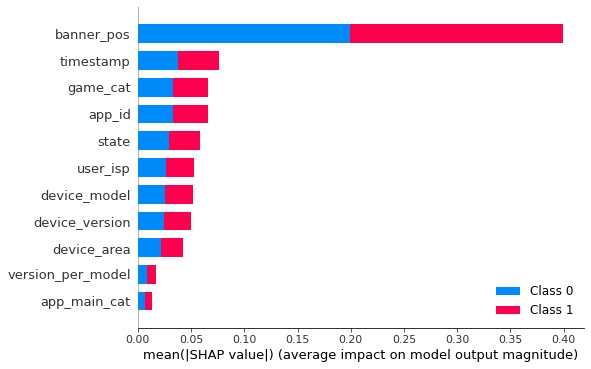

In [81]:
import shap
shap.initjs()

def plot_shap_values(x_train, model):

  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(x_train, approximate=True)

  shap.summary_plot(shap_values, x_train)

plot_shap_values(X_train_db, RF)

The plot shows the list of the features from the most significant to the list significant to the model in descending order.

We can see that the most significant feature in our data set is the banner position, and after it (with a very big gap) is the timestamp of the view of the ad. We can see that a new feature we added - "game_cat" which represent the game category of the app is third in siginificance. 

Local interpretability

In [82]:
import random
shap.initjs()
explainer = shap.TreeExplainer(RF)

rand_indexes = random.sample(range(1, len(X_train_db)), 3)

print("Local shap value for instance {}".format(rand_indexes[0]))
choosen_ins = X_train_db.iloc[rand_indexes[0]]
shap_values = explainer.shap_values(choosen_ins)
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_ins)

Local shap value for instance 2987


To simplify the explination, we will define "units of probability" - UOP - the contribution of the feature to predict the chances of the user clicking on an ad.

In the case of this instance: the banner position feature contributes in the positive direction (meaning - clicking on the ad) 0.24 UOP, while the game category contributes negatively to the chances of clicking on the ad 0.1 UOP. Also, additional features such as the area of the device and user's internet service provider have a negative influence on the chances of the user to click on the ad (around 0.05 UOP).

In [83]:
shap.initjs()
print("Local shap value for instance {}".format(rand_indexes[1]))
choosen_ins = X_train_db.iloc[rand_indexes[1]]
shap_values = explainer.shap_values(choosen_ins)
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_ins)

Local shap value for instance 114


In the case of this instance: the banner position feature contributes in the negative direction (meaning - not clicking on the ad)approximately 0.13 UOP, while the game category contributes negatively to the chances fo clicking on the ad 0.1 UOP. Also, additional features such as the area of the device and user's internet service provider have a negative influence on the chances of the user to click on the ad (around 0.05 UOP).

In [88]:
shap.initjs()
print("Local shap value for instance {}".format(rand_indexes[2]))
choosen_ins = X_train_db.iloc[rand_indexes[1]]
shap_values = explainer.shap_values(choosen_ins)
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_ins)

Local shap value for instance 3067


In the case of this instance (very similar to the previous instance): the banner position feature contributes in the negative direction (meaning - not clicking on the ad) approximately 0.13 UOP, while the game category contributes negatively to the chances fo clicking on the ad 0.1 UOP. Also, additional features such as the area of the device and user's internet service provider have a negative influence on the chances of the user to click on the ad (around 0.05 UOP).

#8. Inference

In [86]:
test_predicted = cat_boost_tuned.predict(test_data)

out_path = '/content/drive/My Drive/Introduction to Data Science/data/output_5.txt'
with open(out_path, 'w') as f:
    for item in test_predicted:
        f.write("%s\n" % item)

# 9. Bonus

The problem in continuous learning is that the new data could be imbalanded, and the model could change it's behaviour according to the new data (will be biased).

For example, if in the continuous learning the model see always a "False" clicked value (no clicking), the model could be biased to predict "False" value.

Another issue is with a new data values which were not seen before, in a category features or a value out of the range of the train data.

One of the ways to handle these issues, is to always balance the data on the new learned data (the learning could be in mini batches), another way is to consider the whole original training data, and train the model on the old and new data (with balance).
